<a href="https://colab.research.google.com/github/4nTor/WordForThought/blob/main/Week%203/Anshit_final/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!apt-get update
!apt-get install -y libsndfile1


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [10]:

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

from tqdm import tqdm



import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
print ("Done")

Done


In [12]:
!pip install kaggle

In [134]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [135]:
import kagglehub

path = kagglehub.dataset_download("ejlok1/cremad")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/cremad/versions/1


In [136]:
Crema = "/root/.cache/kagglehub/datasets/ejlok1/cremad/versions/1/AudioWAV"
crema_directory_list = os.listdir(Crema)
print(crema_directory_list)

['1028_IWW_HAP_XX.wav', '1073_IEO_ANG_HI.wav', '1025_IEO_FEA_MD.wav', '1019_IWL_SAD_XX.wav', '1048_IWL_HAP_XX.wav', '1042_ITS_NEU_XX.wav', '1081_TSI_NEU_XX.wav', '1002_DFA_HAP_XX.wav', '1066_IEO_ANG_MD.wav', '1053_WSI_DIS_XX.wav', '1030_DFA_NEU_XX.wav', '1052_TIE_DIS_XX.wav', '1053_IEO_SAD_MD.wav', '1025_TSI_ANG_XX.wav', '1052_IEO_SAD_HI.wav', '1063_ITS_SAD_XX.wav', '1081_IWL_DIS_XX.wav', '1067_IOM_FEA_XX.wav', '1075_IEO_SAD_LO.wav', '1054_TIE_DIS_XX.wav', '1066_ITS_FEA_XX.wav', '1011_ITH_HAP_XX.wav', '1017_TIE_NEU_XX.wav', '1090_TAI_DIS_XX.wav', '1070_TAI_SAD_XX.wav', '1071_IEO_SAD_LO.wav', '1032_DFA_DIS_XX.wav', '1001_MTI_DIS_XX.wav', '1021_WSI_DIS_XX.wav', '1013_IEO_ANG_MD.wav', '1030_TSI_SAD_XX.wav', '1079_IEO_DIS_HI.wav', '1087_TIE_NEU_XX.wav', '1061_IOM_NEU_XX.wav', '1031_IEO_DIS_HI.wav', '1001_ITH_HAP_XX.wav', '1065_TAI_FEA_XX.wav', '1014_WSI_FEA_XX.wav', '1059_IOM_DIS_XX.wav', '1053_IWW_SAD_XX.wav', '1001_ITS_ANG_XX.wav', '1015_IWW_NEU_XX.wav', '1071_MTI_SAD_XX.wav', '1083_TIE_

In [178]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:

    file_path.append(Crema + '/'+file)

    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
happy      1271
angry      1271
fear       1271
sad        1271
disgust    1271
neutral    1087
Name: count, dtype: int64


In [179]:
import kagglehub

path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1


In [180]:
ravdess = "/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_21', 'Actor_04', 'Actor_13', 'Actor_02', 'Actor_16', 'Actor_10', 'Actor_07', 'Actor_19', 'Actor_24', 'Actor_05', 'Actor_11', 'Actor_17', 'Actor_12', 'Actor_01', 'Actor_15', 'Actor_18', 'Actor_20', 'Actor_09', 'Actor_06', 'Actor_23', 'Actor_03', 'Actor_08', 'Actor_14', 'Actor_22']


In [181]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:

    actor = os.listdir(ravdess + '/'+ i)
    for f in actor:
        part = f.split('.')[0].split('-')

        file_emotion.append(int(part[2]))
        file_path.append(ravdess + '/'+i + '/' + f)

In [182]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-04-02-01-01-22.wav
03
/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_21/03-01-04-02-01-02-21.wav
5
03-01-05-02-01-02-22.wav


In [183]:

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

   Emotions                                               Path
0       sad  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1   neutral  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
2       sad  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
3  surprise  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
4   disgust  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
______________________________________________
     Emotions                                               Path
1435  neutral  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1436    happy  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1437  disgust  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1438    happy  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1439    angry  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
_______________________________________________
Emotions
neutral     288
sad         192
surprise    192
disgust     192
angry       192
fear        192
happy       192
Name: count, dty

In [184]:
data_path = pd.concat([ravdess_df, Crema_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,sad,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1,neutral,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
2,sad,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
3,surprise,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...
4,disgust,/root/.cache/kagglehub/datasets/uwrfkaggler/ra...


In [185]:
print(data_path.Emotions.value_counts())

Emotions
sad         1463
disgust     1463
angry       1463
fear        1463
happy       1463
neutral     1375
surprise     192
Name: count, dtype: int64


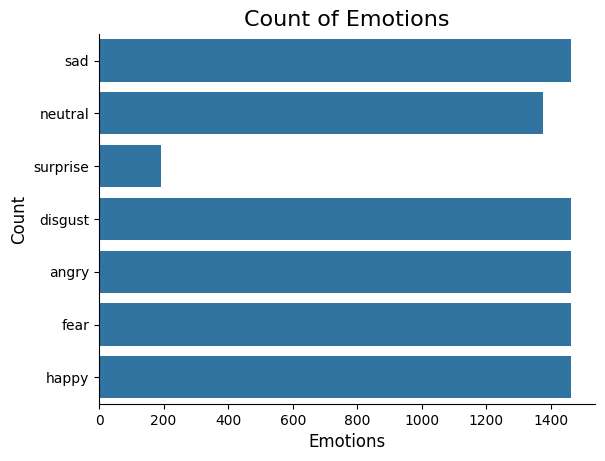

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [187]:
data,sr = librosa.load(file_path[0])
sr

22050

In [188]:
ipd.Audio(data,rate=sr)

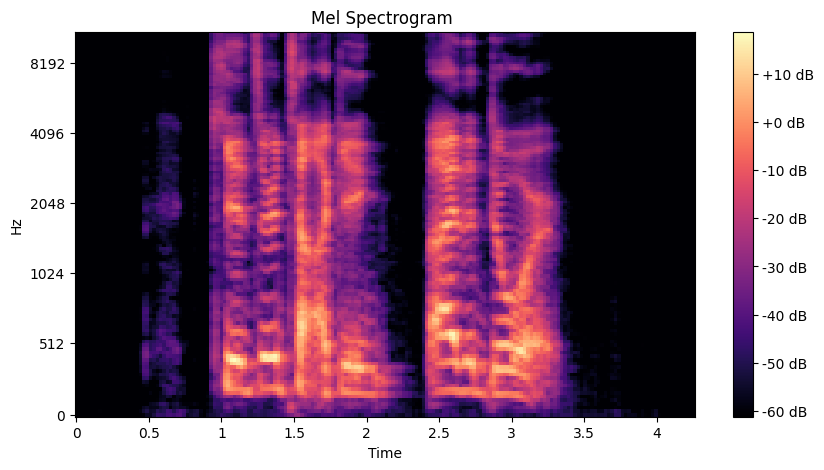

In [189]:

plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB');


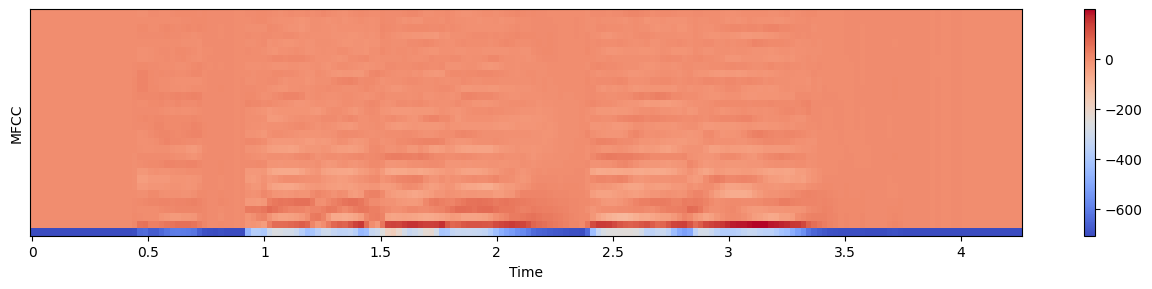

In [190]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [191]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7,n_steps=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps = 0.7)

In [192]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rms = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rms)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data, sr=sr, n_mfcc=20, hop_length=hop_length, n_fft=frame_length)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [193]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())


Number of processors:  2


In [195]:
import timeit
warnings.filterwarnings("ignore")
count = 0
start = timeit.default_timer()

def process_feature(path, emotion):
    global count
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        Y.append(emotion)

    count +=1
    if count % 100 == 0:
        print("Completed:", count)

    return X, Y

paths = data_path.Path
emotions = data_path.Emotions

pool = mp.Pool(processes=mp.cpu_count())


results = pool.starmap(process_feature, zip(paths, emotions))

pool.close()
pool.join()

X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)

stop = timeit.default_timer()

print('Time: ', stop - start)

Completed: 100
Completed: 100
Completed: 200
Completed: 200
Completed: 300
Completed: 300
Completed: 400
Completed: 400
Completed: 500
Completed: 500
Completed: 600
Completed: 600
Completed: 700
Completed: 700
Completed: 800
Completed: 900
Completed: 800
Completed: 1000
Completed: 900
Completed: 1100
Completed: 1000
Completed: 1200
Completed: 1100
Completed: 1300
Completed: 1200
Completed: 1400
Completed: 1500
Completed: 1300
Completed: 1400
Completed: 1600
Completed: 1500
Completed: 1700
Completed: 1600
Completed: 1800
Completed: 1700
Completed: 1900
Completed: 1800
Completed: 2000
Completed: 1900
Completed: 2100
Completed: 2000
Completed: 2200
Completed: 2100
Completed: 2300
Completed: 2200
Completed: 2400
Completed: 2300
Completed: 2500
Completed: 2400
Completed: 2600
Completed: 2500
Completed: 2700
Completed: 2800
Completed: 2600
Completed: 2700
Completed: 2900
Completed: 2800
Completed: 3000
Completed: 2900
Completed: 3100
Completed: 3000
Completed: 3200
Completed: 3100
Completed:

In [196]:
len(X), len(Y), data_path.Path.shape

(35528, 35528, (8882,))

In [197]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('extracted_speech_emotion_dataset.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.109863,0.158203,0.208984,0.194336,0.201660,0.267090,0.337402,0.425293,0.468262,0.478516,...,-26.255070,-11.390368,3.616885,-2.044848,6.605006,8.210720,-1.361735,-14.287403,-8.990480,sad
1,0.238770,0.366211,0.492188,0.498535,0.502441,0.508789,0.511719,0.516602,0.516113,0.513184,...,-18.539343,-3.138522,-0.857250,2.645544,10.374212,8.885081,5.263536,-4.596529,-11.875833,sad
2,0.118652,0.166504,0.213379,0.199219,0.172852,0.174805,0.187012,0.197754,0.215820,0.221191,...,-11.847294,-2.922370,1.396886,4.566164,10.562186,6.496430,-3.812768,-10.672977,-3.831600,sad
3,0.235840,0.358398,0.477051,0.484375,0.482910,0.484863,0.487793,0.485352,0.490723,0.497559,...,-8.275439,-5.710020,0.784158,6.040034,11.834418,7.969877,-4.005100,-11.453301,-3.140842,sad
4,0.131348,0.195312,0.253906,0.248047,0.247070,0.246582,0.240234,0.229004,0.224609,0.216309,...,-15.275479,-3.354883,6.178419,-5.096462,-2.441937,5.764722,-5.956675,-15.946041,11.048059,neutral


In [198]:
Emotions = pd.read_csv('./extracted_speech_emotion_dataset.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.109863,0.158203,0.208984,0.194336,0.201660,0.267090,0.337402,0.425293,0.468262,0.478516,...,-26.255070,-11.390368,3.616885,-2.044848,6.605006,8.210720,-1.361735,-14.287403,-8.990480,sad
1,0.238770,0.366211,0.492188,0.498535,0.502441,0.508789,0.511719,0.516602,0.516113,0.513184,...,-18.539343,-3.138522,-0.857250,2.645544,10.374212,8.885081,5.263536,-4.596529,-11.875833,sad
2,0.118652,0.166504,0.213379,0.199219,0.172852,0.174805,0.187012,0.197754,0.215820,0.221191,...,-11.847294,-2.922370,1.396886,4.566164,10.562186,6.496430,-3.812768,-10.672977,-3.831600,sad
3,0.235840,0.358398,0.477051,0.484375,0.482910,0.484863,0.487793,0.485352,0.490723,0.497559,...,-8.275439,-5.710020,0.784158,6.040034,11.834418,7.969877,-4.005100,-11.453301,-3.140842,sad
4,0.131348,0.195312,0.253906,0.248047,0.247070,0.246582,0.240234,0.229004,0.224609,0.216309,...,-15.275479,-3.354883,6.178419,-5.096462,-2.441937,5.764722,-5.956675,-15.946041,11.048059,neutral


In [199]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [200]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(35528, 2377)

In [201]:
np.sum(Emotions.isna())

,0
0,0
1,0
2,0
3,0
4,0
...,...
2372,0
2373,0
2374,0
2375,0


In [202]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [203]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(Y.shape)
X.shape

(35528, 7)


(35528, 2376)

In [204]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28422, 2376), (28422, 7), (7106, 2376), (7106, 7))

In [205]:

X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [206]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28422, 2376), (28422, 7), (7106, 2376), (7106, 7))

In [209]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)


In [259]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(128,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(32,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),

    L.Conv1D(16,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(16,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),

    L.Conv1D(32,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),

    L.Flatten(),
    L.Dense(64,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_35 (Conv1D)                   │ (None, 2376, 128)           │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 2376, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_35 (MaxPooling1D)      │ (None, 1188, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_36 (Conv1D)                   │ (None, 1188, 32)            │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 1188, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_36 (MaxPooling1D)      │ (None, 594, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 594, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_37 (Conv1D)                   │ (None, 594, 16)             │           2,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 594, 16)             │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_37 (MaxPooling1D)      │ (None, 297, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_38 (Conv1D)                   │ (None, 297, 16)             │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 297, 16)             │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_38 (MaxPooling1D)      │ (None, 149, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 149, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 149, 32)             │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 149, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_39 (MaxPooling1D)      │ (None, 75, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 75, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2400)                │              

 Total params: 181,479 (708.90 KB)

 Trainable params: 180,903 (706.65 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
387/445 ━━━━━━━━━━━━━━━━━━━━ 1:37 2s/step - accuracy: 0.3067 - loss: 1.8527

223/223 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.4336 - loss: 1.4204
Accuracy of our model on test data :  42.85111129283905 %


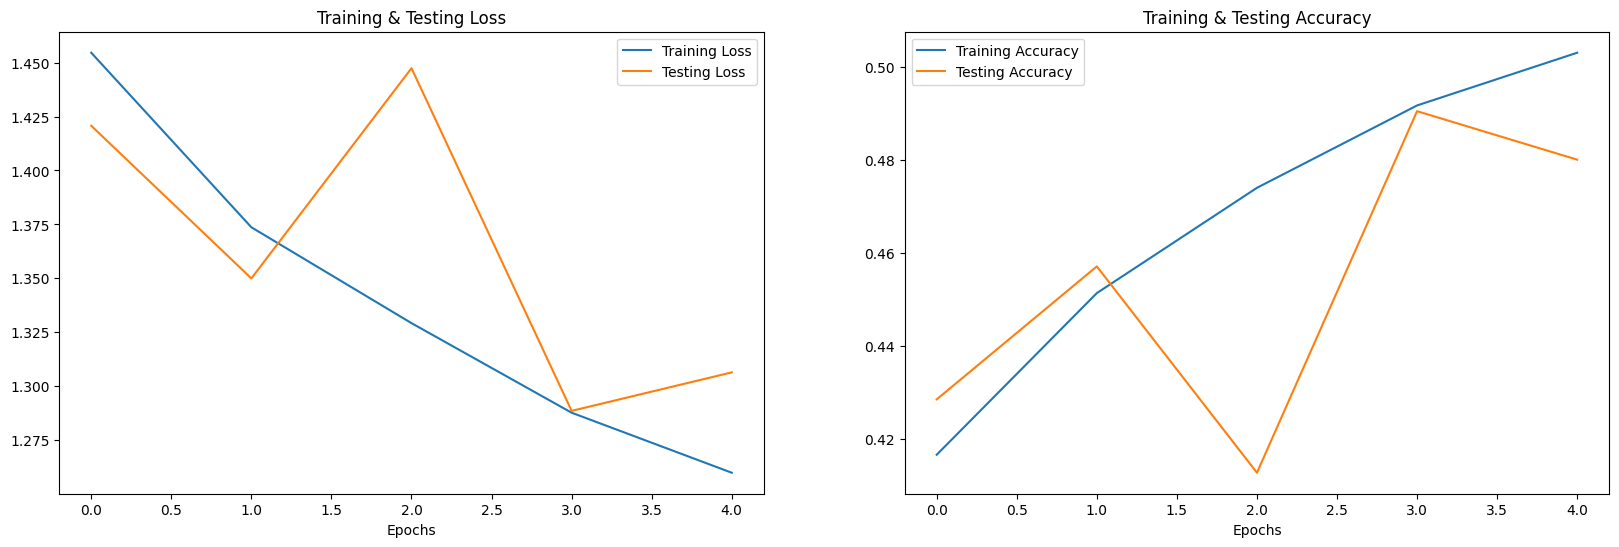

In [226]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [227]:
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step


,Predicted Labels,Actual Labels
0,happy,angry
1,sad,sad
2,fear,happy
3,happy,happy
4,sad,fear
5,happy,fear
6,fear,disgust
7,disgust,angry
8,surprise,angry
9,sad,disgust


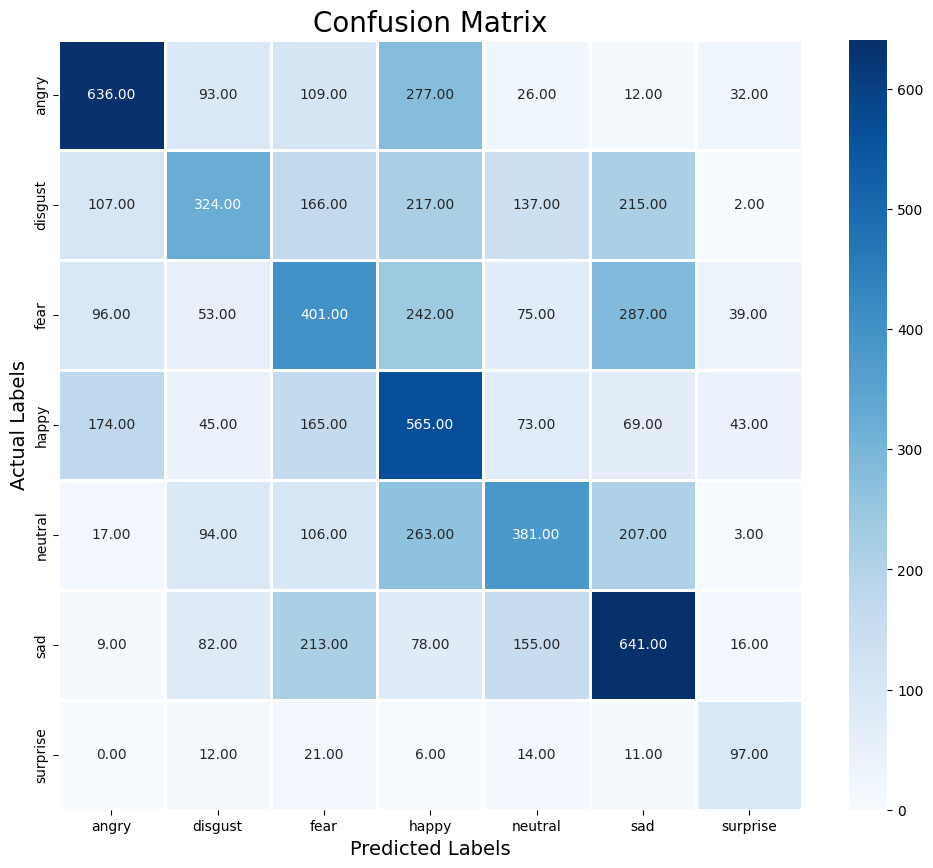

              precision    recall  f1-score   support

       angry       0.61      0.54      0.57      1185
     disgust       0.46      0.28      0.35      1168
        fear       0.34      0.34      0.34      1193
       happy       0.34      0.50      0.41      1134
     neutral       0.44      0.36      0.39      1071
         sad       0.44      0.54      0.49      1194
    surprise       0.42      0.60      0.49       161

    accuracy                           0.43      7106
   macro avg       0.44      0.45      0.43      7106
weighted avg       0.44      0.43      0.43      7106



In [229]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [232]:
from tensorflow.keras.models import model_from_json

model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("CNN_model.weights.h5")
print("Saved model to disk")
from tensorflow.keras.models import model_from_json

with open("CNN_model.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("CNN_model.weights.h5")
print("Loaded model from disk")

loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

score = loaded_model.evaluate(x_testcnn, y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Saved model to disk
Loaded model from disk
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4336 - loss: 1.4204
compile_metrics: 42.85%


In [233]:
import pickle

with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [237]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/content/CNN_model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [239]:
import pickle

with open('/content/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('/content/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [247]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y = data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y = data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [248]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [249]:
res=get_predict_feat("/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_01/03-01-07-01-01-01-01.wav")
print(res.shape)

(1, 2376, 1)


In [250]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [252]:
prediction("/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 141s 141s/step
neutral


In [255]:
data,sr = librosa.load("/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav")
ipd.Audio(data,rate=sr)

In [254]:
prediction("/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
fear


In [256]:
data,sr = librosa.load("/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav")
ipd.Audio(data,rate=sr)